<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/ProgramacionLinealFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

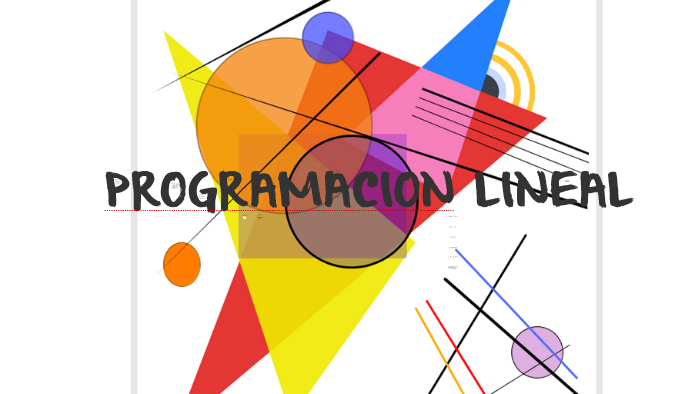



*   **Leidy Castaño**
*   **Omar Torres**



In [4]:
!pip3 install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 48.6 MB/s eta 0:00:00


In [5]:
#from pulp import *
import pulp as p
import pandas as pd
from traitlets.traitlets import Integer
from pulp.constants import LpStatus

**Definición de variables auxiliares**

In [61]:
from pickle import NONE
n = 0                        #En esta variable recivimos el número de variable de desición
i = 0                        #Variable auxiliar para control de ciclos
tipo =0                      #En esta variable almacenamos el tipo de optimización a realizar
vartipo =0                   #En esta variable se almacena el valor que indica si las variables de desición serán enteras o reales
C = []                       #En esta lista se almacena los coeficientes de costos
LRecursos = []               #En esta lista se almacena los valores del lado derecho de las restricciones
c1=0                         #Coeficiente de costo uno
c2=0                         #Coeficiente de costo dos
c3=0                         #Coeficiente de costo tres
c4=0                         #Coeficiente de costo cuatro
c5=0                         #Coeficiente de costo cinco
nr =0                        #En esta variable se indica cuantas ecuaciones de requerimientos tiene el problema
PL = NONE                    #Variable del modelo de optimización
simbolo_desigualdad = []     #En la lista se almacena el tipo de desigualdad de la restricción  1 = "<=" 2 == ">=" 3 = "="
CoefTecnologicos1 = []       #Lista de coeficientes tecnológicos de las restricciones
CoefTecnologicos2 = []
CoefTecnologicos3 = []
CoefTecnologicos4 = []
CoefTecnologicos5 = []
CoefTecnologicos6 = []
CoefTecnologicos7 = []
simbolo_desigualdad = []     #Contiene un numero por cada tipo de desigualdad
i =0
k11=0                        #Variables para recibir los coeficientes tecnológicos
k12=0
k13=0
k14=0
k15=0
k21=0
k22=0
k23=0
k24=0
k25=0
k31=0
k32=0
k33=0
k34=0
k35=0
MAX = 7    #Numero máximo de restricciones

**Entrada de los datos del problema**

In [101]:
#Información para la configuración del modelo

n = int(input("Cuantas variables tiene su problema: "))
nr = int(input("Cuantos requerimientos tiene el problema: "))
tipo = int(input("Tipo de optimización, para maximizar digite 1: , para minimizar digite 2: "))
vartipo = int(input("Tipo de variable, si es entera digite : 1, si es real digite el 2: "))

Cuantas variables tiene su problema: 4
Cuantos requerimientos tiene el problema: 3
Tipo de optimización, para maximizar digite 1: , para minimizar digite 2: 1
Tipo de variable, si es entera digite : 1, si es real digite el 2: 2


**Configuración del metodo simplex**

In [102]:
#Ingreso de los coeficientes de costos

i = 1
C = []
while i <= 5:
    mens = "Dijite coeficientes de costos " + str(i) + " "
    if i <= n:
      C.append(float(input(mens)))
    else: C.append(0)
    i +=1

Dijite coeficientes de costos 1 35
Dijite coeficientes de costos 2 40
Dijite coeficientes de costos 3 20
Dijite coeficientes de costos 4 50


**Entrada lista de recursos**

In [103]:
35# Ingrso de los recursos del modelo
i=1
LRecursos = []
mens = "Dijite recursos [lado derecho de la restricción] : "
while i <= MAX:
  if i<=nr:
    LRecursos.append(float(input(mens + str(i) +" ")))
  else:
      LRecursos.append(0)
  i +=1
print(LRecursos)

Dijite recursos [lado derecho de la restricción] : 1 200
Dijite recursos [lado derecho de la restricción] : 2 300
Dijite recursos [lado derecho de la restricción] : 3 240
[200.0, 300.0, 240.0, 0, 0, 0, 0]


In [104]:
#Función para el ingreso de los coeficientes tecnológicos
def getCoefiTecnologicos(mens, val):
  CoefTecnologicos = []
  i=1
  print("Restriccion " +str(val))
  while i <=5:
      CoefTecnologicos.append(float(input(mens +str(i)+" ")))  #Coeficientes tecnológicos
      i +=1
  print(CoefTecnologicos)
  return  CoefTecnologicos


In [106]:
2#Entrada de ingreso de coeficientes tecnologicos
mens = "Digite el coeficiente tecnológico para la restriccion para X"
CoefTecnologicos1 = []
CoefTecnologicos2 = []
CoefTecnologicos3 = []
CoefTecnologicos4 = []
CoefTecnologicos5 = []
if nr == 1:
    CoefTecnologicos1 = getCoefiTecnologicos(mens, 1)
elif nr ==2:
    CoefTecnologicos1 = getCoefiTecnologicos(mens, 1)
    CoefTecnologicos2 = getCoefiTecnologicos(mens, 2)
elif nr==3:
    CoefTecnologicos1 = getCoefiTecnologicos(mens, 1)
    CoefTecnologicos2 = getCoefiTecnologicos(mens, 2)
    CoefTecnologicos3 = getCoefiTecnologicos(mens, 3)
elif nr==4:
    CoefTecnologicos1 = getCoefiTecnologicos(mens, 1)
    CoefTecnologicos2 = getCoefiTecnologicos(mens, 2)
    CoefTecnologicos3 = getCoefiTecnologicos(mens, 3)
    CoefTecnologicos4 = getCoefiTecnologicos(mens, 4)
elif nr== 5:
    CoefTecnologicos1 = getCoefiTecnologicos(mens, 1)
    CoefTecnologicos2 = getCoefiTecnologicos(mens, 2)
    CoefTecnologicos3 = getCoefiTecnologicos(mens, 3)
    CoefTecnologicos4 = getCoefiTecnologicos(mens, 4)
    CoefTecnologicos5 = getCoefiTecnologicos(mens, 5)
elif nr==6:
    CoefTecnologicos1 = getCoefiTecnologicos(mens, 1)
    CoefTecnologicos2 = getCoefiTecnologicos(mens, 2)
    CoefTecnologicos3 = getCoefiTecnologicos(mens, 3)
    CoefTecnologicos4 = getCoefiTecnologicos(mens, 4)
    CoefTecnologicos5 = getCoefiTecnologicos(mens, 5)
    CoefTecnologicos6 = getCoefiTecnologicos(mens, 5)
else:
    CoefTecnologicos1 =  getCoefiTecnologicos(mens, 1)
    CoefTecnologicos2 =  getCoefiTecnologicos(mens, 2)
    CoefTecnologicos3 =  getCoefiTecnologicos(mens, 3)
    CoefTecnologicos4 =  getCoefiTecnologicos(mens, 4)
    CoefTecnologicos5 =  getCoefiTecnologicos(mens, 5)
    CoefTecnologicos6 =  getCoefiTecnologicos(mens, 5)
    CoefTecnologicos7 =  getCoefiTecnologicos(mens, 5)


Restriccion 1
Digite el coeficiente tecnológico para la restriccion para X1 1
Digite el coeficiente tecnológico para la restriccion para X2 2
Digite el coeficiente tecnológico para la restriccion para X3 3
Digite el coeficiente tecnológico para la restriccion para X4 4
Digite el coeficiente tecnológico para la restriccion para X5 0
[1.0, 2.0, 3.0, 4.0, 0.0]
Restriccion 2
Digite el coeficiente tecnológico para la restriccion para X1 2
Digite el coeficiente tecnológico para la restriccion para X2 4
Digite el coeficiente tecnológico para la restriccion para X3 4
Digite el coeficiente tecnológico para la restriccion para X4 7
Digite el coeficiente tecnológico para la restriccion para X5 0
[2.0, 4.0, 4.0, 7.0, 0.0]
Restriccion 3
Digite el coeficiente tecnológico para la restriccion para X1 4
Digite el coeficiente tecnológico para la restriccion para X2 4
Digite el coeficiente tecnológico para la restriccion para X3 0
Digite el coeficiente tecnológico para la restriccion para X4 5
Digite el 

**Ingreso del simbolo de desigualdad**

In [107]:
def def_desigualdad():
   simbolo_desigualdad = []
   print("__________Ingreso signo de desigualdad__________" +"\n")
   i = 1
   while  i <= nr:
      simb = int(input("\n Desigualdad " + str(i) +"\n Digite 1:para <=, digite 2: >=, digite 3 para = "))
      simbolo_desigualdad.append(simb)
      i +=1
   return simbolo_desigualdad


**Retorno de coeficiente de costos**

In [108]:
def costos():
   return C[0],C[1], C[2], C[3], C[4]

**Construcción del Maximización o de Minimización**

In [109]:
PL=NONE
if tipo==1:
  PL = p.LpProblem('OPTIMIZACIÖN', p.LpMaximize)
else:
  if tipo ==2:
     PL = p.LpProblem('OPTIMIZACIÖN', p.LpMinimize)
i = 1
if vartipo == 1:
      x1 = p.LpVariable("X1",lowBound=0, cat = p.LpInteger)
      x2 = p.LpVariable("X2",lowBound=0, cat = p.LpInteger)
      x3 = p.LpVariable("X3",lowBound=0, cat = p.LpInteger)
      x4 = p.LpVariable("X4",lowBound=0, cat = p.LpInteger)
      x5 = p.LpVariable("X5",lowBound=0, cat = p.LpInteger)
else:
    if vartipo ==2:
         x1 = p.LpVariable("X1",lowBound=0)
         x2 = p.LpVariable("X2",lowBound=0)
         x3 = p.LpVariable("X3",lowBound=0)
         x4 = p.LpVariable("X4",lowBound=0)
         x5 = p.LpVariable("X5",lowBound=0)



**Construcción del model**

In [110]:
#Función que retorna los recursos del problema, lado derecho de las restricciones

def getRecursos():
    LD1 = LRecursos[0]
    LD2 = LRecursos[1]
    LD3 = LRecursos[2]
    LD4 = LRecursos[3]
    LD5 = LRecursos[4]
    LD6 = LRecursos[5]
    LD7 = LRecursos[6]
    return LRecursos[0],LRecursos[1],LRecursos[2],LRecursos[3],LRecursos[4],LRecursos[5],LRecursos[6]

In [111]:
def getCoef(item):
  if item == 1:
    return CoefTecnologicos1[0], CoefTecnologicos1[1],  CoefTecnologicos1[2],CoefTecnologicos1[3],CoefTecnologicos1[4]
  elif item ==2:
    return CoefTecnologicos2[0], CoefTecnologicos2[1],  CoefTecnologicos2[2],CoefTecnologicos2[3],CoefTecnologicos2[4]
  elif item==3:
       return CoefTecnologicos3[0], CoefTecnologicos3[1],  CoefTecnologicos3[2],CoefTecnologicos3[3],CoefTecnologicos3[4]
  elif item ==4:
    return CoefTecnologicos4[0], CoefTecnologicos4[1],  CoefTecnologicos4[2],CoefTecnologicos4[3],CoefTecnologicos4[4]
  elif item ==5:
    return CoefTecnologicos5[0], CoefTecnologicos5[1],  CoefTecnologicos5[2],CoefTecnologicos5[3],CoefTecnologicos5[4]
  elif item == 6:
     return CoefTecnologicos6[0], CoefTecnologicos6[1],  CoefTecnologicos6[2],CoefTecnologicos6[3],CoefTecnologicos6[4]
  else: return CoefTecnologicos7[0], CoefTecnologicos7[1],  CoefTecnologicos7[2],CoefTecnologicos7[3],CoefTecnologicos7[4]

**Construccion del modelo**

In [112]:
def constRestic(PL,k1, k2, k3, k4, k5, ldr, sim):
   k11, k12,k13,k14,k15 = getCoef(1)
   if sim == 1:
      PL += (k1*x1 + k2*x2 + k3*x3 + k4*x4 + k5*x5 <=ldr)
   elif sim == 2:
      PL += (k1*x1 + k2*x2 + k3*x3 + k4*x4 + k5*x5 >= ldr)
   else:
    PL += (k1*x1 + k2*x2 + k3*x3 + k4*x4 + k5*x5 >= ldr)


In [113]:
c1, c2, c3, c4, c5 = costos()
PL += (c1*x1 + c2*x2 + c3*x3 + c4*x4 + c5*x5, 'Z')  #Se define la función de costos

LD1,LD2,LD3, LD4, LD5, LD6, LD7 = getRecursos()
simb = def_desigualdad()
if nr ==1:
   k11, k12,k13,k14,k15 = getCoef(1)
   simb = simbolo_desigualdad[0]
   constRestic(PL,k11, k12, k13, k14, k15, LD1, simb[0])
elif nr ==2:
   k11, k12,k13,k14,k15 = getCoef(1)
   k21, k22,k23,k24,k25 = getCoef(2)
   constRestic(PL,k11, k12, k13, k14, k15, LD1, simb[0])
   constRestic(PL,k21, k22, k23, k24, k25, LD2, simb[1])
elif nr==3:
   k11, k12,k13,k14,k15 = getCoef(1)
   k21, k22,k23,k24,k25 = getCoef(2)
   k31, k32,k33,k34,k35 = getCoef(3)
   constRestic(PL,k11, k12, k13, k14, k15, LD1,simb[0])
   constRestic(PL,k21, k22, k23, k24, k25, LD2, simb[1])
   constRestic(PL,k31, k32, k33, k34, k35, LD3, simb[2])
elif nr ==4:
   k11, k12,k13,k14,k15 = getCoef(1)
   k21, k22,k23,k24,k25 = getCoef(2)
   k31, k32,k33,k34,k35 = getCoef(3)
   k41, k42,k43,k44,k45 = getCoef(4)
   constRestic(PL,k11, k12, k13, k14, k15, LD1,simb[0])
   constRestic(PL,k21, k22, k23, k24, k25, LD2,simb[1])
   constRestic(PL,k31, k32, k33, k34, k35, LD3, simb[2])
   constRestic(PL,k41, k42, k43, k44, k45, LD4, simb[3])
elif nr==5:
   k11, k12,k13,k14,k15 = getCoef(1)
   k21, k22,k23,k24,k25 = getCoef(2)
   k31, k32,k33,k34,k35 = getCoef(3)
   k41, k42,k43,k44,k45 = getCoef(4)
   k51, k52,k53,k54,k55 = getCoef(5)
   constRestic(PL,k11, k12, k13, k14, k15, LD1, simb[0])
   constRestic(PL,k21, k22, k23, k24, k25, LD2, simb[1])
   constRestic(PL,k31, k32, k33, k34, k35, LD3, simb[2])
   constRestic(PL,k41, k42, k43, k44, k45, LD4, simb[3])
   constRestic(PL,k51, k52, k53, k54, k55, LD5, simb[4])
elif nr == 6:
   k11, k12,k13,k14,k15 = getCoef(1)
   k21, k22,k23,k24,k25 = getCoef(2)
   k31, k32,k33,k34,k35 = getCoef(3)
   k41, k42,k43,k44,k45 = getCoef(4)
   k51, k52,k53,k54,k55 = getCoef(5)
   k61, k62,k63,k64,k65 = getCoef(6)
   constRestic(PL,k11, k12, k13, k14, k15, LD1, simb[0])
   constRestic(PL,k21, k22, k23, k24, k25, LD2, simb[1])
   constRestic(PL,k31, k32, k33, k34, k35, LD3, simb[2])
   constRestic(PL,k41, k42, k43, k44, k45, LD4, simb[3])
   constRestic(PL,k51, k52, k53, k54, k55, LD5, simb[4])
   constRestic(PL,k61, k62, k63, k64, k65, LD6, simb[5])
else:
   k11, k12,k13,k14,k15 = getCoef(1)
   k21, k22,k23,k24,k25 = getCoef(2)
   k31, k32,k33,k34,k35 = getCoef(3)
   k41, k42,k43,k44,k45 = getCoef(4)
   k51, k52,k53,k54,k55 = getCoef(5)
   k61, k62,k63,k64,k65 = getCoef(6)
   k71, k72,k73,k74,k75 = getCoef(7)
   constRestic(PL,k11, k12, k13, k14, k15, LD1, simb[0])
   constRestic(PL,k21, k22, k23, k24, k25, LD2, simb[1])
   constRestic(PL,k31, k32, k33, k34, k35, LD3, simb[2])
   constRestic(PL,k41, k42, k43, k44, k45, LD4, simb[3])
   constRestic(PL,k51, k52, k53, k54, k55, LD5, simb[4])
   constRestic(PL,k61, k62, k63, k64, k65, LD6, simb[5])
   constRestic(PL,k71, k72, k73, k74, k75, LD7, simb[6])


__________Ingreso signo de desigualdad__________


 Desigualdad 1
 Digite 1:para <=, digite 2: >=, digite 3 para = 1

 Desigualdad 2
 Digite 1:para <=, digite 2: >=, digite 3 para = 1

 Desigualdad 3
 Digite 1:para <=, digite 2: >=, digite 3 para = 1


**Construcción del modelo**

In [114]:
PL

OPTIMIZACIÖN:
MAXIMIZE
35.0*X1 + 40.0*X2 + 20.0*X3 + 50.0*X4 + 0.0
SUBJECT TO
_C1: X1 + 2 X2 + 3 X3 + 4 X4 <= 200

_C2: 2 X1 + 4 X2 + 4 X3 + 7 X4 <= 300

_C3: 4 X1 + 4 X2 + 5 X4 <= 240

VARIABLES
X1 Continuous
X2 Continuous
X3 Continuous
X4 Continuous

**Ejecución del método solve() que resuelve el modelos simplex**

In [115]:
PL.solve()

1

**Resultados del problema de optimización**

In [117]:
print(f"status: {PL.status}, {LpStatus[PL.status]}")
for var in PL.variables():
  print(f"{var.name} :{var.value()}")
#print("Valor optimo ", "X1 = ", x1.varValue, "X2 = ", x2.varValue, "X3 = ",x3.varValue)
print("Z = ",p.value(PL.objective))

status: 1, Optimal
X1 :60.0
X2 :0.0
X3 :45.0
X4 :0.0
Z =  3000.0


**Sensibilidad del modelo**

In [25]:
sensibilidad =[{'Restriccion' : i, "Valores sombra": j.pi, 'Holgura': j.slack}
   for i, j in PL.constraints.items()]
print(pd.DataFrame(sensibilidad))

  Restriccion  Valores sombra  Holgura
0         _C1            5.00     -0.0
1         _C2            1.25     -0.0
2         _C3           -0.00     55.0


**Lo que sobra**


In [ ]:
for name, constraint in PL.constraints.items():
  print(f"{name}:{constraint.value()}")

_C1:0.0
_C2:0.0
_C3:-55.0
